In [1]:
#coding:utf-8
import pandas as pd
import time

from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew #加载一些统计的库

In [2]:
def time2cov(time_):
    '''
    时间是根据天数推移，所以日期为脱敏，但是时间本身不脱敏
    :param time_: 
    :return: 
    '''
    return time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(time_))

In [3]:
def pre_process(data):
    '''
    :param data: 
    :return: 
    '''

    print('预处理')
    print('context_timestamp_ing')
    data['context_timestamp'] = data['context_timestamp'].apply(time2cov)

    print('time')
    data['context_timestamp_tmp'] = pd.to_datetime(data['context_timestamp'])
    data['week'] = data['context_timestamp_tmp'].dt.weekday
    data['hour'] = data['context_timestamp_tmp'].dt.hour
    data['minute'] = data['context_timestamp_tmp'].dt.minute
    data['halfhour'] = (data['hour']+1)*6+(data['minute']/10).astype('int')
    del data['context_timestamp_tmp']
    return data

In [4]:
data = pd.read_csv('train.csv',index_col=False)
data2 = pd.read_csv('test.csv',index_col=False) 

In [5]:
data = pre_process(data)
data2 = pre_process(data2)

预处理
context_timestamp_ing
time
预处理
context_timestamp_ing
time


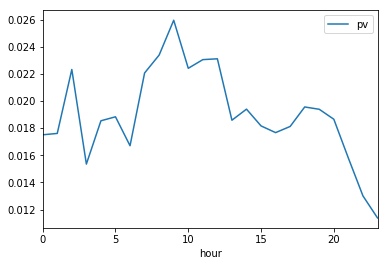

In [7]:
name = 'hour'
temp = data[[name,'is_trade']].groupby([name]).aggregate('sum')
temp1 = temp.reset_index()
temp2 = data[[name,'is_trade']].groupby([name]).aggregate('count').reset_index()
temp3 = pd.merge(temp1,temp2,on=[name],how='left')
temp4 = temp3[['is_trade_x']].rename(columns=({'is_trade_x':'sum'}))/temp3[['is_trade_y']].rename(columns=({'is_trade_y':'sum'}))
temp3['pv'] = temp4
temp3.drop('is_trade_x', axis=1, inplace=True)
temp3.drop('is_trade_y', axis=1, inplace=True)
# pd.merge(data,temp3,on=['user_gender_id','property_0'],how='left')
# temp3[temp3['item_brand_id']==9132883203614799821]
temp3.plot(x=name,y='pv')

In [8]:
data[['hour','is_trade']].groupby(['hour']).aggregate('sum')
# 3 -6,1-2,7-8,9-12,13-18,19-22,23-1

,is_trade
hour,
0,189
1,79
2,55
3,29
4,29
5,44
6,90
7,243
8,362


In [9]:
data[['hour','is_trade']].groupby(['hour']).aggregate('count')

,is_trade
hour,
0,10794
1,4486
2,2464
3,1889
4,1564
5,2336
6,5388
7,11014
8,15480


In [10]:
# 3 -6,1-2,7-8,9-12,13-18,19-22,23-1
def change(x):
    if (0==x) or (x>=23):
        return 1
    elif x>=3 and x<=6:
        return 2
    elif x>=7 and x<=8:
        return 3
    elif x>=9 and x<=12:
        return 4
    elif x>=13 and x<=18:
        return 5
    elif x>=19 and x<=22:
        return 6
    elif x<=2 and x>=1:
        return 7

In [11]:
data[['hour']]

,hour
0,10
1,12
2,3
3,6
4,19
5,23
6,22
7,16
8,2
9,23


In [12]:
data['hour'] = data['hour'].apply(change)
data2['hour'] = data2['hour'].apply(change)

In [13]:
data = data.rename(columns=({'hour':'hour_num'}))
data2 = data2.rename(columns=({'hour':'hour_num'}))

In [14]:
data[['instance_id','hour_num']].to_csv('train_hour.csv',index=False) 
data2[['instance_id','hour_num']].to_csv('test_hour.csv',index=False) 